In [1]:
# Importting Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading and reading dataset

df = pd.read_csv("HollywoodsMostProfitableStories (1).csv",encoding="ISO-8859-1")
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008.0
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009.0
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011.0
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009.0
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007.0
...,...,...,...,...,...,...,...,...
74,The Hangover,Comedy,NaN,NaN,NaN,NaN,NaN,NaN
75,Avatar,Fantasy,NaN,NaN,NaN,NaN,NaN,2009.0
76,Black Swan,Drama,NaN,NaN,NaN,NaN,NaN,2010.0
77,Hugo,NaN,NaN,NaN,NaN,NaN,NaN,2011.0


In [3]:
# Overall information about this dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               79 non-null     object 
 1   Genre              78 non-null     object 
 2   Lead Studio        73 non-null     object 
 3   Audience  score %  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  73 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               78 non-null     float64
dtypes: float64(5), object(3)
memory usage: 5.1+ KB


In [4]:
# Dataset statistics

df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
count,73.000000,71.000000,73.000000,74.000000,78.000000
mean,64.136986,4.741610,47.356164,136.351979,2009.115385
std,13.647665,8.292017,26.242655,157.067561,1.357813
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,52.000000,1.790680,27.000000,32.447500,2008.000000
50%,64.000000,2.642353,45.000000,73.198612,2009.000000
75%,76.000000,4.850958,65.000000,190.185250,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


In [5]:
# Get columns name

df.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience  score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [6]:
# Change columns' name

df.rename(columns = {'Audience  score %':'Audience Rating','Profitability':'Profit','Rotten Tomatoes %':'Rotten Tomatoes Rating','Worldwide Gross':'Worldwide Revenue'}, inplace = True) 

In [7]:
# Check if there is missing values

df.isnull().sum()

Film                      0
Genre                     1
Lead Studio               6
Audience Rating           6
Profit                    8
Rotten Tomatoes Rating    6
Worldwide Revenue         5
Year                      1
dtype: int64

In [8]:
# Display all rows with missing values in any column to check if it is necessary to remove or replace those values

df[df.isna().any(axis=1)]

,Film,Genre,Lead Studio,Audience Rating,Profit,Rotten Tomatoes Rating,Worldwide Revenue,Year
18,Jane Eyre,Romance,Universal,77.0,NaN,85.0,30.14700,2011.0
38,No Reservations,Comedy,NaN,64.0,3.307180,39.0,92.60105,2007.0
41,Our Family Wedding,Comedy,Independent,49.0,NaN,14.0,21.37000,2010.0
50,Something Borrowed,Romance,Independent,NaN,1.719514,NaN,60.18300,2011.0
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.04000,2010.0
74,The Hangover,Comedy,NaN,NaN,NaN,NaN,NaN,NaN
75,Avatar,Fantasy,NaN,NaN,NaN,NaN,NaN,2009.0
76,Black Swan,Drama,NaN,NaN,NaN,NaN,NaN,2010.0
77,Hugo,NaN,NaN,NaN,NaN,NaN,NaN,2011.0
78,The Help,Drama,NaN,NaN,NaN,NaN,NaN,2011.0


In [9]:
# Among missing values, only row no.38 we know the fact that 'No Reservations' was distributed by Warner Bros (NaN in 'Lead Studio') and the rest we do not information.
# Change the value of row no.38, add Warner Bros as Lead Studio

df.loc[38,'Lead Studio']=['Warner Bros.']

In [10]:
# Remove all other missing values

df.dropna(inplace=True)

In [11]:
# Check duplicates in Column 'Film'

df['Film'].duplicated().sum()

0

In [12]:
# Change datatype of 'Audience Review','Rotten Tomatoes Review' and 'Year' to int

df[['Audience Rating', 'Rotten Tomatoes Rating', 'Year']] = df[['Audience Rating', 'Rotten Tomatoes Rating', 'Year']].astype(int)

In [13]:
# Dataset information after cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 73
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Film                    70 non-null     object 
 1   Genre                   70 non-null     object 
 2   Lead Studio             70 non-null     object 
 3   Audience Rating         70 non-null     int32  
 4   Profit                  70 non-null     float64
 5   Rotten Tomatoes Rating  70 non-null     int32  
 6   Worldwide Revenue       70 non-null     float64
 7   Year                    70 non-null     int32  
dtypes: float64(2), int32(3), object(3)
memory usage: 4.1+ KB


In [14]:
# Check top rows of dataset

df.head()

,Film,Genre,Lead Studio,Audience Rating,Profit,Rotten Tomatoes Rating,Worldwide Revenue,Year
0,27 Dresses,Comedy,Fox,71,5.343622,40,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81,8.096000,87,60.720000,2009
2,A Dangerous Method,Drama,Independent,89,0.448645,79,8.972895,2011
3,A Serious Man,Drama,Universal,64,4.382857,89,30.680000,2009
4,Across the Universe,Romance,Independent,84,0.652603,54,29.367143,2007


In [15]:
# Check bottom rows of dataset

df.tail()

,Film,Genre,Lead Studio,Audience Rating,Profit,Rotten Tomatoes Rating,Worldwide Revenue,Year
68,Water For Elephants,Drama,20th Century Fox,72,3.081421,60,117.094000,2011
69,What Happens in Vegas,Comedy,Fox,72,6.267647,28,219.367646,2008
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,26.660000,2010
72,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,19.620000,2010
73,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,41.941000,2008


<Axes: >

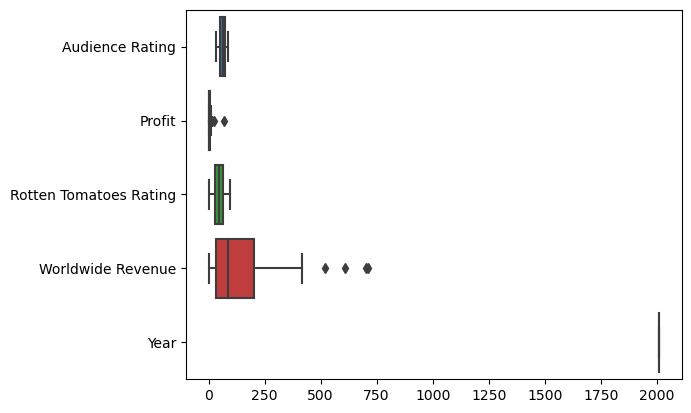

In [16]:
#Check outliers using Boxplot

sns.boxplot(df,orient='h')

array([[<Axes: title={'center': 'Audience Rating'}>,
        <Axes: title={'center': 'Profit'}>],
       [<Axes: title={'center': 'Rotten Tomatoes Rating'}>,
        <Axes: title={'center': 'Worldwide Revenue'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

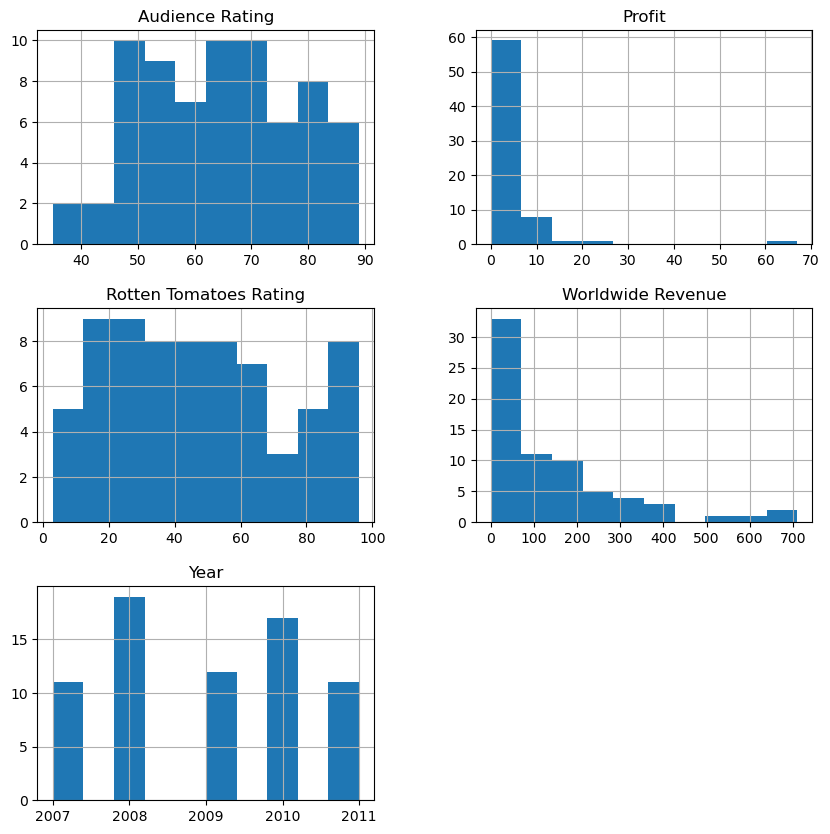

In [17]:
# check data distribution using histograms

df.hist(figsize=(10,10))

C:\Users\thaop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


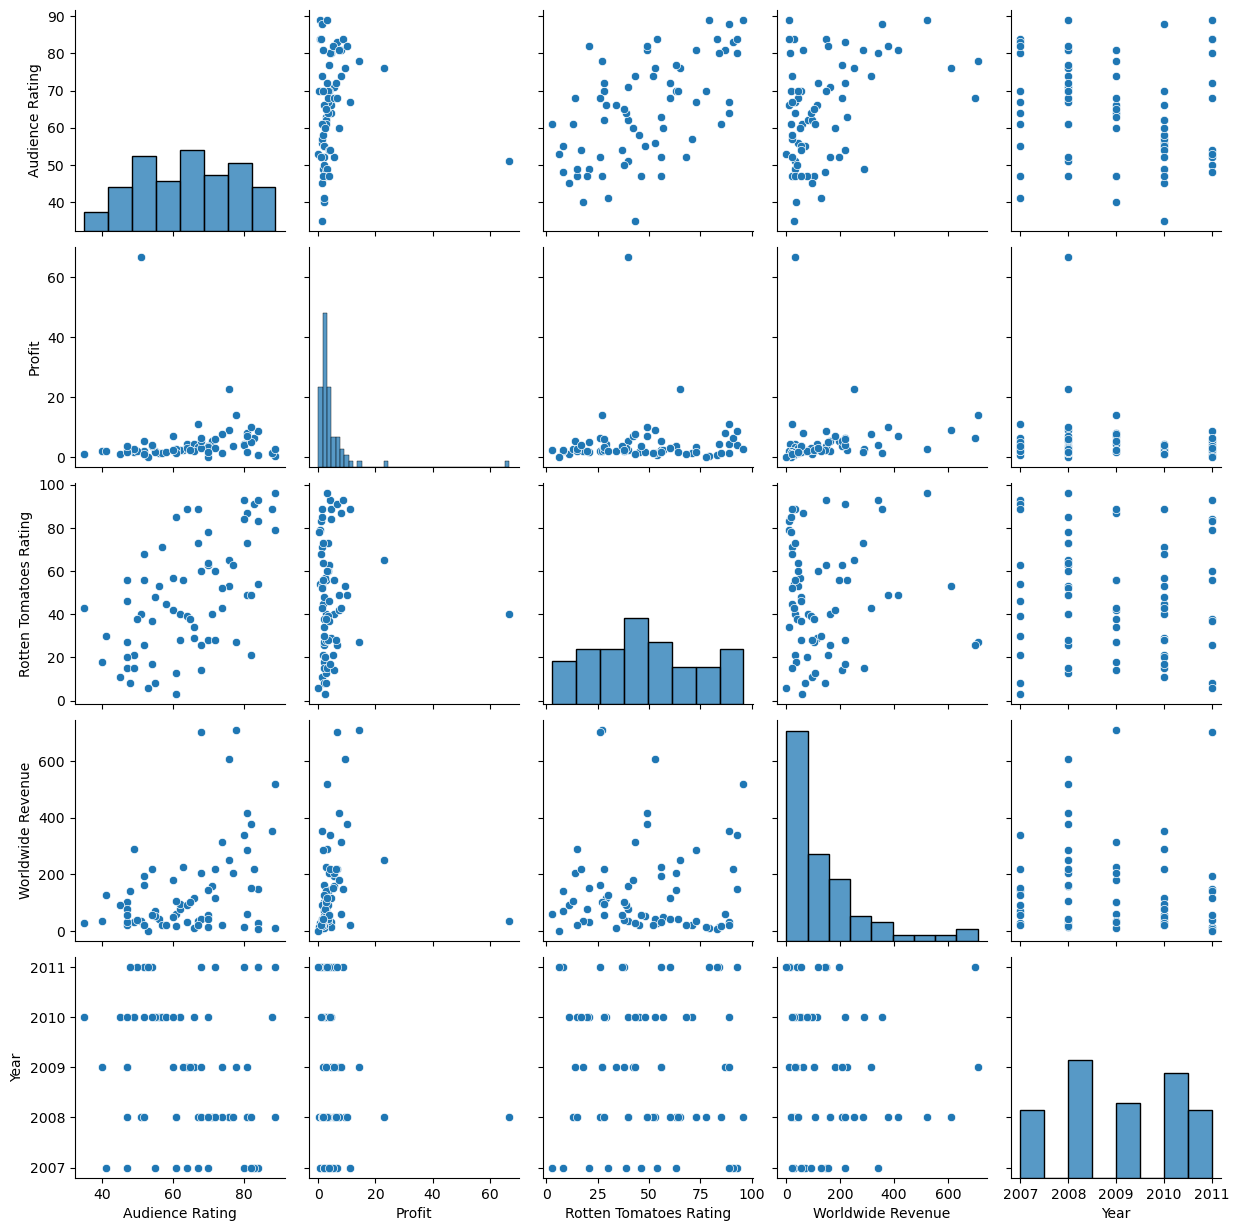

In [18]:
# Explore the relationships between variables

sns.pairplot(df)

In [19]:
df.to_excel('Hollywood.xlsx')